## Boston Housing Price Prediction
There are 506 samples and 13 feature variables in this Boston dataset. The main goal is to predict the value of prices of the house using the given features.

In [1]:
%pylab inline 

import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

# special matplotlib argument for improved plots
from matplotlib import rcParams
sns.set_style("whitegrid")
sns.set_context("poster")

Populating the interactive namespace from numpy and matplotlib


### Dataset importing

In [25]:
# Reding the dataset of housing.
train_df = pd.read_csv("data/house_dataset.csv")

In [26]:
# Here print all the features value like ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX','PTRATIO', 'B', 'LSTAT', 'MEDV']
train_df.keys()

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

In [27]:
train_df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,486.000000,486.000000,486.000000,486.000000,506.000000,506.000000,486.000000,506.000000,506.000000,506.000000,506.000000,506.000000,486.000000,506.000000
mean,3.611874,11.211934,11.083992,0.069959,0.554695,6.284634,68.518519,3.795043,9.549407,408.237154,18.455534,356.674032,12.715432,22.532806
std,8.720192,23.388876,6.835896,0.255340,0.115878,0.702617,27.999513,2.105710,8.707259,168.537116,2.164946,91.294864,7.155871,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.081900,0.000000,5.190000,0.000000,0.449000,5.885500,45.175000,2.100175,4.000000,279.000000,17.400000,375.377500,7.125000,17.025000
50%,0.253715,0.000000,9.690000,0.000000,0.538000,6.208500,76.800000,3.207450,5.000000,330.000000,19.050000,391.440000,11.430000,21.200000
75%,3.560262,12.500000,18.100000,0.000000,0.624000,6.623500,93.975000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [28]:
# It print the shape of our housing dataset like (rows, columns) format.
train_df.shape

(506, 14)

In [29]:
# It shows the first five rows of the dataset.
train_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


In [30]:
# this describe function shows the total count, mean, std, min, 25%, 50%, 75% and max values on respected all features
train_df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,486.000000,486.000000,486.000000,486.000000,506.000000,506.000000,486.000000,506.000000,506.000000,506.000000,506.000000,506.000000,486.000000,506.000000
mean,3.611874,11.211934,11.083992,0.069959,0.554695,6.284634,68.518519,3.795043,9.549407,408.237154,18.455534,356.674032,12.715432,22.532806
std,8.720192,23.388876,6.835896,0.255340,0.115878,0.702617,27.999513,2.105710,8.707259,168.537116,2.164946,91.294864,7.155871,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.081900,0.000000,5.190000,0.000000,0.449000,5.885500,45.175000,2.100175,4.000000,279.000000,17.400000,375.377500,7.125000,17.025000
50%,0.253715,0.000000,9.690000,0.000000,0.538000,6.208500,76.800000,3.207450,5.000000,330.000000,19.050000,391.440000,11.430000,21.200000
75%,3.560262,12.500000,18.100000,0.000000,0.624000,6.623500,93.975000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


### Data Cleaning
Data Cleaning is the most important part of the Data Analysis. For data cleaning, we need to search for any missing data. The missing data is normally converted into NaN values by the Pandas Dataframe.  df.isnull().sum() returns the amount of null values in a particular column or feature.

In [66]:
train_df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [64]:
train_df['CRIM'].isnull().sum()

0

In [56]:
train_df['CRIM'].mean()

3.6118739711934156

In [65]:
train_df['CRIM'].fillna(train_df['CRIM'].mean(),inplace=True)
train_df['ZN'].fillna(train_df['ZN'].mean(),inplace=True)
train_df['INDUS'].fillna(train_df['INDUS'].mean(),inplace=True)
train_df['CHAS'].fillna(train_df['CHAS'].mean(),inplace=True)
train_df['AGE'].fillna(train_df['AGE'].mean(),inplace=True)
train_df['LSTAT'].fillna(train_df['LSTAT'].mean(),inplace=True)

In [67]:
train_df.shape

(506, 14)

In [22]:
train_df.dropna(inplace=True)

In [23]:
# now in our housing dataset all values are not Null so we can proceed further.
train_df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [24]:
train_df.shape

(394, 14)

## Representation of Data:
Scatter plots are used to plot data points on a horizontal and a vertical axis in the attempt to show how much one variable is affected by another. Each row in the data table is represented by a marker whose position depends on its values in the columns set on the X and Y axes.

Let's look at some scatter plots for three variables: 'CRIM', 'RM' and 'PTRATIO'.<br>
What kind of relationship do you see? e.g. positive, negative? linear? non-linear?

In [68]:
train_df.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

## Splitting dataset into Train and Test
Basically, before splitting the data to train-test dataset, we would need to split the dataset into two: target value and predictor values. Let’s call the target value y and predictor values X.<br>

y = Boston Housing Price<br>
X = All other features

In [69]:
X=train_df[['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']]
y=train_df['MEDV']

Now, we can finally split the dataset into train and test with the snippet below.

In [70]:
from sklearn.model_selection import train_test_split

# splitting the data into train = 66% and for testing = 33%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [71]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(339, 13)
(167, 13)
(339,)
(167,)


The above snippet will fit a model based on X_train and y_train. Now we already got the linear model, we try to predict it to the X_test and now we got the prediction values which stored into y_pred. To visualize the differences between actual prices and predicted values we also create a scatter plot.

30.6840403819187


Text(0.5, 1.0, 'Prices vs Predicted prices- $y_i$ vs $\\hat{y}_i$')

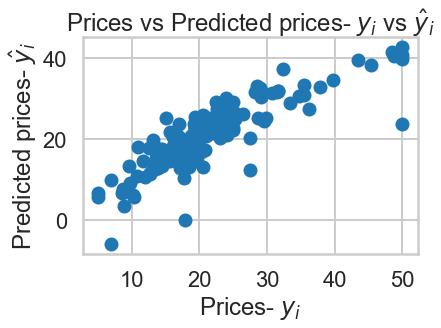

In [72]:
from sklearn.linear_model import LinearRegression

lr=LinearRegression()
lr.fit(X_train,y_train)
print(lr.intercept_)

y_pred = lr.predict(X_test)

plt.scatter(y_test, y_pred)
plt.xlabel("Prices- $y_i$")
plt.ylabel("Predicted prices- $\hat{y}_i$")
plt.title("Prices vs Predicted prices- $y_i$ vs $\hat{y}_i$")

Ideally, the scatter plot should create a linear line. Since the model does not fit 100%, the scatter plot is not creating a linear line.

## Model Evaluation :

### Mean Squared Error :
To check the level of error of a model, we can use Mean Squared Error. It is one of the procedure to measures the average of the squares of error. Basically, it will check the difference between actual value and the predicted value.

In [45]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
print(mse)

26.461593774885298


In [47]:
from sklearn.metrics import r2_score

y_train_predict = lr.predict(X_train)
rmse = (np.sqrt(mean_squared_error(y_train, y_train_predict)))
r2 = r2_score(y_train, y_train_predict)

print("The model performance for training set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print("\n")

# model evaluation for testing set
y_test_predict = lr.predict(X_test)
rmse = (np.sqrt(mean_squared_error(y_test, y_test_predict)))
r2 = r2_score(y_test, y_test_predict)

print("The model performance for testing set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))

The model performance for training set
--------------------------------------
RMSE is 4.087216479409939
R2 score is 0.7898107354847058


The model performance for testing set
--------------------------------------
RMSE is 5.14408337557677
R2 score is 0.7061651569646414


In [81]:
from sklearn import metrics
y_pred = lr.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred))

ValueError: continuous is not supported